## Köşe Algılama 
- Köşeler, iki kenarın kesişimi olduğu için bu iki kenarın yönlerinin değiştiği bir noktayı temsil eder
- Köşeler, resimdeki renk geçişindeki bir varyasyonu temsil ettiğinden, görüntü yoğunluğundaki  varyasyonu arayacağız.

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

(294, 316)


(<Figure size 640x480 with 1 Axes>,
 Text(0.5, 1.0, 'Original Image'),
 (-0.5, 315.5, 293.5, -0.5))

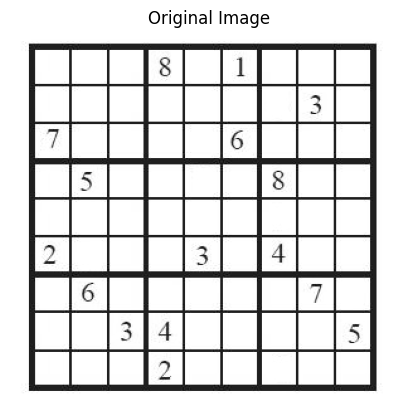

In [2]:
# Load image then grayscale
img = cv2.imread("sudoku.jpg", 0)
img = np.float32(img)
print(img.shape)
plt.figure(), plt.imshow(img, cmap = "gray"), plt.title("Original Image"), plt.axis("off")

(<Figure size 640x480 with 1 Axes>,
 Text(0.5, 1.0, 'Harris Corner Detection'),
 (-0.5, 315.5, 293.5, -0.5))

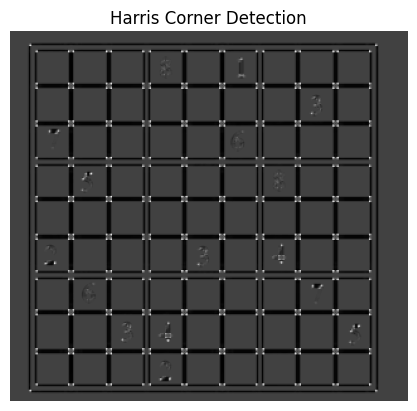

In [3]:
# Harris Corner Detection
dst = cv2.cornerHarris(img, blockSize = 2, ksize = 3, k = 0.04)
plt.figure(), plt.imshow(dst, cmap = "gray"), plt.title("Harris Corner Detection"), plt.axis("off")

(<Figure size 640x480 with 1 Axes>,
 Text(0.5, 1.0, 'Harris Corner Detection'),
 (-0.5, 315.5, 293.5, -0.5))

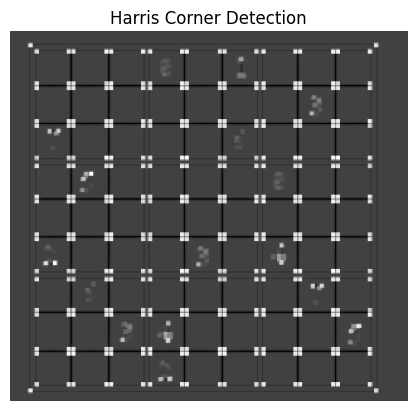

In [4]:
# kenarları daha iyi görmek için
dst = cv2.dilate(dst, None) #genişletme işlemi
img[dst > 0.2 * dst.max()] = 1
plt.figure(), plt.imshow(dst, cmap = "gray"), plt.title("Harris Corner Detection"), plt.axis("off")

(<matplotlib.image.AxesImage at 0x7ff28c8f8520>,
 Text(0.5, 1.0, 'Shi-Tomasi Corner Detection'),
 (-0.5, 315.5, 293.5, -0.5))

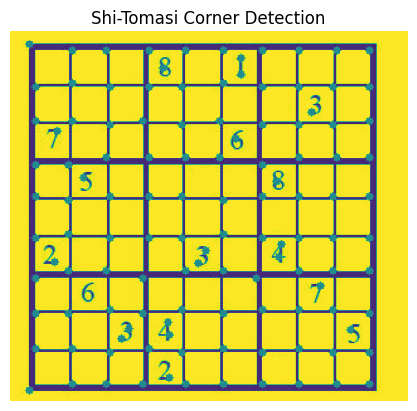

In [7]:
# Shi-Tomasi Corner Detection
img = cv2.imread("sudoku.jpg", 0)
img = np.float32(img)

# 120 tane köşe noktası bul
#0.01 köşe noktası için en düşük kalite
#10 kenarlar arasındaki minimum mesafe
corners = cv2.goodFeaturesToTrack(img, 120, 0.01, 10)
corners = np.int64(corners)

for i in corners:
    x, y = i.ravel()
    cv2.circle(img, (x, y), 3, (125,125,125),cv2.FILLED)

plt.imshow(img), plt.title("Shi-Tomasi Corner Detection"), plt.axis("off")